In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import os
 


zarr_file = zarr.open('train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr', mode='r')


In [2]:
zarr_file.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='0 (184, 630, 630) flo…

In [16]:
voxel_data = zarr_file['/1'][:]
print("Voxel data shape:", voxel_data.shape)
print("Voxel data type:", voxel_data.dtype)

Voxel data shape: (92, 315, 315)
Voxel data type: float32


In [17]:
# voxel_data= voxel_data
voxel_data

array([[[ 8.7848804e-07,  3.6837887e-06,  2.3836378e-07, ...,
         -8.0164369e-07,  4.6072330e-08, -6.5137334e-07],
        [ 1.8831283e-06,  3.8136998e-06,  4.8773950e-06, ...,
         -1.0138174e-06, -1.1033085e-06, -5.3569488e-07],
        [ 3.9011288e-06,  9.9687509e-07, -2.2399240e-07, ...,
         -5.4150064e-07,  1.7693164e-06,  1.0930137e-06],
        ...,
        [ 6.2073372e-07,  5.0646628e-07,  1.3242199e-06, ...,
         -5.4005714e-06,  4.4331205e-06,  1.7317971e-06],
        [ 4.7182280e-07,  1.5046903e-06,  1.1701673e-06, ...,
         -2.5977010e-07, -3.7335801e-07,  1.5139558e-07],
        [-1.3302882e-07,  9.5014860e-07,  1.3186761e-06, ...,
          1.3193747e-06,  1.0897199e-06,  9.8099338e-07]],

       [[-2.2608481e-07,  4.7949607e-06,  3.2795942e-06, ...,
          1.5044039e-06, -1.5596806e-06, -2.1814037e-06],
        [ 1.4785144e-06,  7.0432488e-06,  4.7055350e-06, ...,
          1.0991461e-06, -2.8362417e-06, -2.6720322e-06],
        [ 7.5413459e-06, 

In [18]:
voxel_data[:,0,0].shape


(92,)

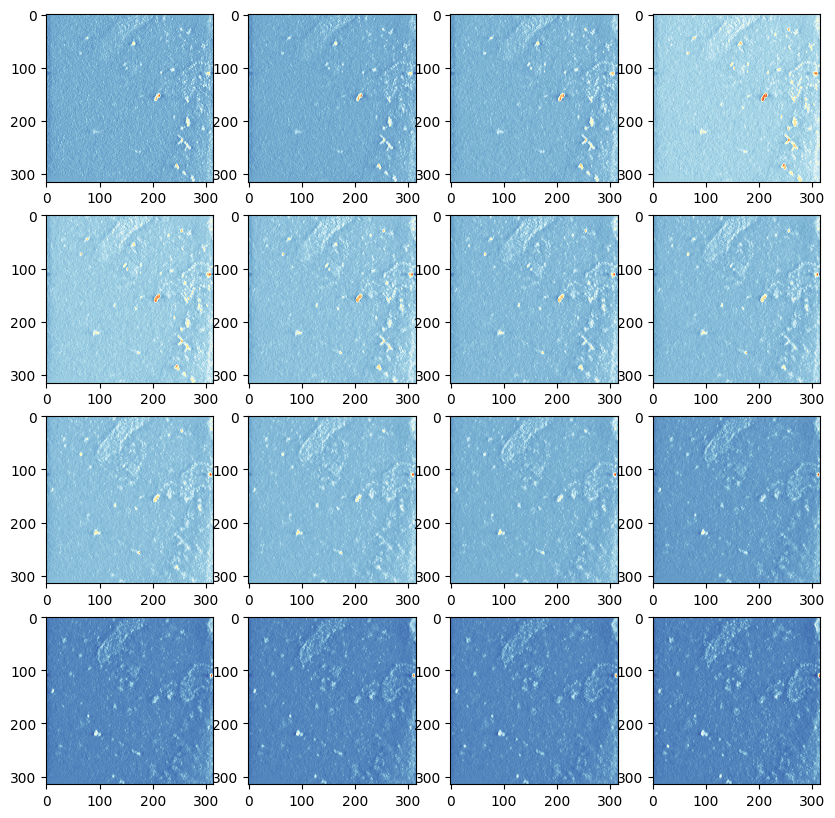

In [19]:
plt.figure(figsize=(10,10))
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(voxel_data[i], cmap='RdYlBu')

In [20]:
import plotly
import plotly.express as px
import plotly.io as pio
from skimage import exposure


pio.renderers.default = "vscode"

In [21]:
def enhance(image):
    vmin, vmax = np.percentile(image, q=(0.5, 99.5))
    image = exposure.rescale_intensity(image, in_range=(vmin, vmax), 
                                     out_range=np.float32)
    return image

In [22]:
fig = px.imshow(enhance(voxel_data), animation_frame=0, 
                binary_string=True, binary_format='jpg')

In [23]:
plotly.io.show(fig)